# Chapter 5 exercises

In [336]:
import numpy as np
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from sklearn.model_selection import train_test_split

### Conceptual Problem 2h

In [337]:
rng = np.random.default_rng(10)
store = np.empty(10000)
for i in range(10000):
    store[i] = np.sum(rng.choice(100, replace=True) == 4) > 0
np.mean(store)

0.0089

In [338]:
1/100

0.01

## Applied Exercises


In [339]:
from functools import partial
from sklearn.model_selection import \
     (cross_validate,
      KFold,
      ShuffleSplit)
from sklearn.base import clone
from ISLP.models import sklearn_sm
np.random.seed(0)


### 5.

In Chapter 4, we used logistic regression to predict the probability of
default using income and balance on the Default data set. We will
now estimate the test error of this logistic regression model using the
validation set approach. Do not forget to set a random seed before
beginning your analysis.
#### (a)
Fit a logistic regression model that uses income and balance to predict default

In [340]:
Default = load_data('Default')
Default

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


In [341]:
design = MS(['balance', 'income']).fit(Default)
X = design.fit_transform(Default)
y = Default.default == 'Yes'
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-11.540500,0.435000,-26.544,0.0
balance,0.005600,0.000000,24.835,0.0
income,0.000021,0.000005,4.174,0.0


In [342]:
probs = results.predict(exog=X)
labels = np.array(['Yes']*10000)
labels[probs<=0.5]='No'
labels[:1000]

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'N

In [343]:
confusion_table(labels, Default.default)

Truth,No,Yes
Predicted,,
No,9629,225
Yes,38,108


#### (b)

Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:

Split the sample set into a training set and a validation set.

In [344]:
Default_train, Default_test = train_test_split(Default,
                                         test_size=5000,
                                         random_state=0)


II. Fit a multiple logistic regression model using only the train-
ing observations.

In [345]:
# hp_mm = MS(['horsepower'])
X_train = design.fit_transform(Default_train)
y_train = Default_train.default == 'Yes'
glm = sm.GLM(y_train,
             X_train,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-11.389600,0.635000,-17.935,0.000
balance,0.005600,0.000000,16.792,0.000
income,0.000016,0.000007,2.151,0.031


III. Obtain a prediction of default status for each individual in
the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.

In [346]:
X_test = design.fit_transform(Default_test)
y_test = Default_test.default == 'Yes'
probs = results.predict(exog=X_test)

In [347]:
labels = np.array(['Yes']*5000)
labels[probs<=0.5] = 'No'
labels[:10]

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'],
      dtype='<U3')

In [348]:
from ISLP import confusion_table

In [349]:
confusion_table(labels, Default_test.default)

Truth,No,Yes
Predicted,,
No,4801,132
Yes,13,54


IV. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

In [350]:
(13+132)/5000

0.029

#### (c)

Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Com- ment on the results obtained.

In [351]:
Default_train, Default_test = train_test_split(Default,
                                         test_size=5000,
                                         random_state=1)
# hp_mm = MS(['horsepower'])
X_train = design.fit_transform(Default_train)
y_train = Default_train.default == 'Yes'
glm = sm.GLM(y_train,
             X_train,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)
X_test = design.fit_transform(Default_test)
y_test = Default_test.default == 'Yes'
probs = results.predict(exog=X_test)
labels = np.array(['Yes']*5000)
labels[probs<=0.5] = 'No'
labels[:10]
ct=confusion_table(labels, Default_test.default)
(ct.iloc[1,0]+ct.iloc[0,1])/5000


0.025

In [352]:
Default_train, Default_test = train_test_split(Default,
                                         test_size=5000,
                                         random_state=2)
# hp_mm = MS(['horsepower'])
X_train = design.fit_transform(Default_train)
y_train = Default_train.default == 'Yes'
glm = sm.GLM(y_train,
             X_train,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)
X_test = design.fit_transform(Default_test)
y_test = Default_test.default == 'Yes'
probs = results.predict(exog=X_test)
labels = np.array(['Yes']*5000)
labels[probs<=0.5] = 'No'
labels[:10]
ct=confusion_table(labels, Default_test.default)
(ct.iloc[1,0]+ct.iloc[0,1])/5000

0.0248

In [353]:
Default_train, Default_test = train_test_split(Default,
                                         test_size=200,
                                         random_state=2)
# hp_mm = MS(['horsepower'])
X_train = design.fit_transform(Default_train)
y_train = Default_train.default == 'Yes'
glm = sm.GLM(y_train,
             X_train,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)
X_test = design.fit_transform(Default_test)
y_test = Default_test.default == 'Yes'
probs = results.predict(exog=X_test)
labels = np.array(['Yes']*200)
labels[probs<=0.5] = 'No'
labels[:10]
ct=confusion_table(labels, Default_test.default)
(ct.iloc[1,0]+ct.iloc[0,1])/200

0.035

In [354]:
Default_train, Default_test = train_test_split(Default,
                                         test_size=200,
                                         random_state=1)
# hp_mm = MS(['horsepower'])
X_train = design.fit_transform(Default_train)
y_train = Default_train.default == 'Yes'
glm = sm.GLM(y_train,
             X_train,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)
X_test = design.fit_transform(Default_test)
y_test = Default_test.default == 'Yes'
probs = results.predict(exog=X_test)
labels = np.array(['Yes']*200)
labels[probs<=0.5] = 'No'
labels[:10]
ct=confusion_table(labels, Default_test.default)
(ct.iloc[1,0]+ct.iloc[0,1])/200

0.03

In [355]:
Default_train, Default_test = train_test_split(Default,
                                         test_size=200,
                                         random_state=0)
# hp_mm = MS(['horsepower'])
X_train = design.fit_transform(Default_train)
y_train = Default_train.default == 'Yes'
glm = sm.GLM(y_train,
             X_train,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)
X_test = design.fit_transform(Default_test)
y_test = Default_test.default == 'Yes'
probs = results.predict(exog=X_test)
labels = np.array(['Yes']*200)
labels[probs<=0.5] = 'No'
labels[:10]
ct=confusion_table(labels, Default_test.default)
(ct.iloc[1,0]+ct.iloc[0,1])/200

0.02

#### (d)

Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the val- idation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.

In [356]:
Default.student = Default.student.map(dict(Yes=1, No=0))
Default

,default,student,balance,income
0,No,0,729.526495,44361.625074
1,No,1,817.180407,12106.134700
2,No,0,1073.549164,31767.138947
3,No,0,529.250605,35704.493935
4,No,0,785.655883,38463.495879
...,...,...,...,...
9995,No,0,711.555020,52992.378914
9996,No,0,757.962918,19660.721768
9997,No,0,845.411989,58636.156984
9998,No,0,1569.009053,36669.112365


In [357]:
design = MS(['balance', 'income', 'student']).fit(Default)
Default_train, Default_test = train_test_split(Default,
                                         test_size=5000,
                                         random_state=2)
X_train = design.fit_transform(Default_train)
y_train = Default_train.default == 'Yes'
glm = sm.GLM(y_train,
             X_train,
             family=sm.families.Binomial())
results = glm.fit()
X_test = design.fit_transform(Default_test)
probs = results.predict(exog=X_test)
labels = np.array(['Yes']*5000)
labels[probs<=0.5] = 'No'
ct=confusion_table(labels, Default_test.default)
(ct.iloc[1,0]+ct.iloc[0,1])/5000

0.0254

Adding the dummy variable for student seems to not affect the test error rate by much.

### 6.
We continue to consider the use of a logistic regression model to
predict the probability of default using income and balance on the
Default data set. In particular, we will now compute estimates for the
standard errors of the income and balance logistic regression coefcients in two diferent ways: (1) using the bootstrap, and (2) using the
standard formula for computing the standard errors in the sm.GLM()
function. Do not forget to set a random seed before beginning your
analysis

#### (a)
Using the summarize() and sm.GLM() functions, determine the
estimated standard errors for the coefcients associated with
income and balance in a multiple logistic regression model that
uses both predictors.

In [358]:
Default = load_data('Default')
Default

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


In [359]:
Default.default = Default.default.map(dict(Yes=1, No=0))
Default

,default,student,balance,income
0,0,No,729.526495,44361.625074
1,0,Yes,817.180407,12106.134700
2,0,No,1073.549164,31767.138947
3,0,No,529.250605,35704.493935
4,0,No,785.655883,38463.495879
...,...,...,...,...
9995,0,No,711.555020,52992.378914
9996,0,No,757.962918,19660.721768
9997,0,No,845.411989,58636.156984
9998,0,No,1569.009053,36669.112365


In [360]:
Default

,default,student,balance,income
0,0,No,729.526495,44361.625074
1,0,Yes,817.180407,12106.134700
2,0,No,1073.549164,31767.138947
3,0,No,529.250605,35704.493935
4,0,No,785.655883,38463.495879
...,...,...,...,...
9995,0,No,711.555020,52992.378914
9996,0,No,757.962918,19660.721768
9997,0,No,845.411989,58636.156984
9998,0,No,1569.009053,36669.112365


In [361]:
design = MS(['balance', 'income']).fit(Default)
X = design.fit_transform(Default)
y = Default.default == 1
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-11.540500,0.435000,-26.544,0.0
balance,0.005600,0.000000,24.835,0.0
income,0.000021,0.000005,4.174,0.0


The standard errors for the coefficients associated with income and balance are approximately 5*10^-6 and 0.

#### (b)

Write a function, boot_fn(), that takes as input the Default data
set as well as an index of the observations, and that outputs
the coefcient estimates for income and balance in the multiple
logistic regression model.

A bootstrap standard error function is below:

In [362]:
def boot_SE(func,
            D,
            n=None,
            B=1000,
            seed=0):
    rng = np.random.default_rng(seed)
    first_, second_ = 0, 0
    n = n or D.shape[0]
    for _ in range(B):
        idx = rng.choice(D.index,
                         n,
                         replace=True)
        value = func(D, idx)
        first_ += value
        second_ += value**2
    return np.sqrt(second_ / B - (first_ / B)**2)

A bootstrap function for boothstrapping a regression model:

In [363]:
def boot_GLM(model_matrix, response, D, idx):
    D_ = D.loc[idx]
    Y_ = D_[response]
    X_ = clone(model_matrix).fit_transform(D_)
    return  sm.GLM(Y_,
             X_,
             family=sm.families.Binomial()).fit().params

The function that outputs the coefficient estimates for income and balance:

In [364]:
boot_fn=partial(boot_GLM, MS(['balance','income']), 'default')

In [365]:
rng = np.random.default_rng(0)
np.array([boot_fn(Default,
          rng.choice(1000,
                     1000,
                     replace=True)) for _ in range(10)])

array([[-1.04036736e+01,  4.98631061e-03,  2.03233678e-05],
       [-1.03639410e+01,  5.26184982e-03,  1.50556538e-05],
       [-1.19866812e+01,  6.12590454e-03,  3.34683163e-05],
       [-1.15513279e+01,  5.91434158e-03,  1.95389076e-05],
       [-1.55028507e+01,  7.00298761e-03,  7.88004295e-05],
       [-1.03744307e+01,  5.00180534e-03,  3.02375769e-05],
       [-1.22011845e+01,  5.76451958e-03,  3.39766209e-05],
       [-1.24689282e+01,  6.66585837e-03,  2.05016679e-05],
       [-1.04468359e+01,  4.73259586e-03,  3.16776354e-05],
       [-1.32518147e+01,  6.40224875e-03,  4.08903036e-05]])

In [366]:
np.asarray(Default)

array([[0, 'No', 729.5264952072861, 44361.62507426691],
       [0, 'Yes', 817.180406555498, 12106.1347003149],
       [0, 'No', 1073.54916401173, 31767.1389473999],
       ...,
       [0, 'No', 845.411989217448, 58636.1569838071],
       [0, 'No', 1569.0090533837197, 36669.1123645833],
       [0, 'Yes', 200.92218263479697, 16862.9523209407]], dtype=object)

#### Part (c)

In [367]:
boot_se=boot_SE(boot_fn,
                Default,
                B=1000,
                seed=10)

In [368]:
boot_se

intercept    0.425280
balance      0.000227
income       0.000005
dtype: float64

We now see a Standard Error for balance. This is probably more accurate.

Let's consider what happens when balance and income are scaled.

In [369]:
Default_copy=Default.copy(deep=True)

In [370]:
Default_copy.balance=Default_copy.balance*100
Default_copy

,default,student,balance,income
0,0,No,72952.649521,44361.625074
1,0,Yes,81718.040656,12106.134700
2,0,No,107354.916401,31767.138947
3,0,No,52925.060475,35704.493935
4,0,No,78565.588293,38463.495879
...,...,...,...,...
9995,0,No,71155.502049,52992.378914
9996,0,No,75796.291845,19660.721768
9997,0,No,84541.198922,58636.156984
9998,0,No,156900.905338,36669.112365


In [371]:
Default

,default,student,balance,income
0,0,No,729.526495,44361.625074
1,0,Yes,817.180407,12106.134700
2,0,No,1073.549164,31767.138947
3,0,No,529.250605,35704.493935
4,0,No,785.655883,38463.495879
...,...,...,...,...
9995,0,No,711.555020,52992.378914
9996,0,No,757.962918,19660.721768
9997,0,No,845.411989,58636.156984
9998,0,No,1569.009053,36669.112365


In [372]:
design_copy = MS(['balance', 'income']).fit(Default_copy)
X = design_copy.fit_transform(Default_copy)
y = Default_copy.default == 1
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-11.540500,0.435000,-26.544,0.0
balance,0.000056,0.000002,24.835,0.0
income,0.000021,0.000005,4.174,0.0


#### Part (d)

The assumption that they have the same variance and the fact that they are on different scales gives more accuracy to the bootstrap method's standard errors.

### 7.

In Sections 5.1.2 and 5.1.3, we saw that the cross_validate() function can be used in order to compute the LOOCV test error estimate. Alternatively, one could compute those quantities using just sm.GLM() and the predict() method of the fitted model within a for loop. You will now take this approach in order to compute the LOOCV error for a simple logistic regression model on the Weekly data set. Recall that in the context of classification problems, the LOOCV error is given in (5.4).

#### Part (a)

Fit a logistic regression model that predicts Direction using Lag1 and Lag2.

In [373]:
Weekly=load_data('Weekly')
Weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [374]:
design = MS(['Lag1', 'Lag2']).fit(Weekly)
X = design.fit_transform(Weekly)
y = Weekly.Direction == 'Up'
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.2212,0.061,3.599,0.000
Lag1,-0.0387,0.026,-1.477,0.140
Lag2,0.0602,0.027,2.270,0.023


#### Part (b)

Fit a logistic regression model that predicts Direction using Lag1 and Lag2 using all but the first observation.

In [375]:
Weekly_copy=Weekly.copy(deep=True)

In [376]:
Weekly_copy

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [377]:
Weekly_copy.drop([0],inplace=True)

In [378]:
Weekly_copy

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
5,1990,1.178,0.712,3.514,-2.576,-0.270,0.154444,-1.372,Down
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [379]:
design = MS(['Lag1', 'Lag2']).fit(Weekly_copy)
X = design.fit_transform(Weekly_copy)
y = Weekly_copy.Direction == 'Up'
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.2232,0.061,3.630,0.000
Lag1,-0.0384,0.026,-1.466,0.143
Lag2,0.0608,0.027,2.291,0.022


#### Part (c)

Use the model from (b) to predict the direction of the first observation. You can do this by predicting that the first observation will go up if P (Direction = "Up"|Lag1, Lag2) > 0.5. Was this observation correctly classified?

In [380]:
Weekly.iloc[0]

Year             1990
Lag1            0.816
Lag2            1.572
Lag3           -3.936
Lag4           -0.229
Lag5           -3.484
Volume       0.154976
Today           -0.27
Direction        Down
Name: 0, dtype: object

In [381]:
X_valid=design.transform(Weekly)

In [382]:
X_valid

,intercept,Lag1,Lag2
0,1.0,0.816,1.572
1,1.0,-0.270,0.816
2,1.0,-2.576,-0.270
3,1.0,3.514,-2.576
4,1.0,0.712,3.514
...,...,...,...
1084,1.0,-0.861,0.043
1085,1.0,2.969,-0.861
1086,1.0,1.281,2.969
1087,1.0,0.283,1.281


In [383]:
y_valid = Weekly.Direction.map(dict(Up=1, Down=0))
y_valid

0       0
1       0
2       1
3       1
4       1
       ..
1084    1
1085    1
1086    1
1087    1
1088    1
Name: Direction, Length: 1089, dtype: int64

In [384]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   intercept  1089 non-null   float64
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
dtypes: float64(3)
memory usage: 25.7 KB


In [385]:
X_valid.iloc[0]

intercept    1.000
Lag1         0.816
Lag2         1.572
Name: 0, dtype: float64

In [386]:
float=results.predict(X_valid.iloc[0])[0]
float

0.5713923205204429


No, this observation did not correctly classify.

#### Part (d)

Write a for loop from i=1 to i=n, where n is the number of observations in the data set, that performs each of the following steps:

In [387]:
error_array=[None]*Weekly.shape[0]
for i in range(Weekly.shape[0]):
    Weekly_copy=Weekly.copy(deep=True)
    Weekly_copy.drop([i],inplace=True)
    
    design = MS(['Lag1', 'Lag2']).fit(Weekly_copy)
    X = design.fit_transform(Weekly_copy)
    y = Weekly_copy.Direction == 'Up'
    glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
    results = glm.fit()
    prediction=round(results.predict(X_valid.iloc[i])[0])
    error=abs(prediction-y_valid.iloc[i])
    error_array[i]=error
  
    

print(error_array)


[1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 

#### Part (d)

Take the average of the n numbers obtained in (d)iv in order to obtain the LOOCV estimate for the test error. Comment on the results.

In [388]:
np.mean(error_array)

0.44995408631772266

This is not a great prediction. But it's better than randomly guessing.

### 8.

We will now perform cross-validation on a simulated data set.

#### Part (a)

Generate a simulated data set as follows:

In [389]:
rng = np.random.default_rng(2)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

In [390]:
x

array([ 0.18905338, -0.52274844, -0.41306354, -2.44146738,  1.79970738,
        1.14416587, -0.32542284,  0.77380659,  0.28121067, -0.55382284,
        0.97756745, -0.31055655, -0.3288239 , -0.79214676,  0.45495807,
       -0.09919805,  0.54528871, -0.6071857 ,  0.12682785, -0.89227404,
        0.84146497,  0.18803509,  0.33057101,  0.41050391, -1.0107575 ,
        0.783181  ,  2.05670282, -1.6384425 , -1.72941147, -1.50483141,
        0.84145889,  0.12871566,  1.07834244,  0.72243087,  0.21057181,
        0.28403815, -0.1697605 ,  0.86846021, -1.12971596, -0.42185883,
        0.24293885,  1.80142086, -0.76446412, -1.07906046, -0.5632872 ,
        0.9692722 , -0.23500551,  1.32434702, -1.87252952,  1.12852314,
        1.03486624, -1.41866569,  0.15358189,  1.21575764,  0.08791904,
        0.99970142,  2.37488691,  0.27393225, -0.28038231, -0.77105216,
        0.6480646 , -0.19673007, -0.17874637, -0.10525978,  0.64986965,
       -1.06633961, -1.52987649, -2.4338767 ,  1.1986709 ,  0.07

In this data set, what is n and what is p? Write out the model used to generate the data in equation form.

We have $$n=100,$$ the same size and $$p=2,$$ because $p$ is predictors and we have the two predictors as $X$ and $X^2$.
Our model would be $$Y=\beta_0 +\beta_1 X+\beta_2 X^2+ \varepsilon$$

#### Part (b)

Create a scatterplot of X against Y . Comment on what you find.

In [391]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

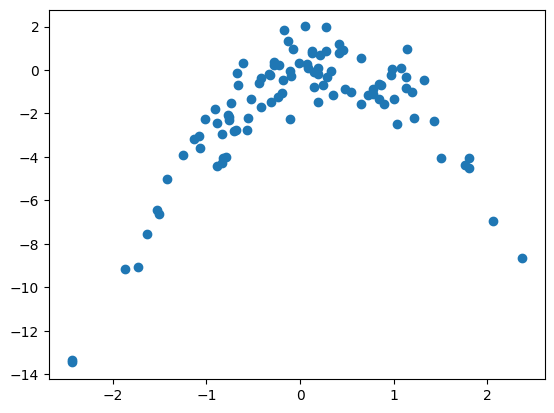

In [392]:
plt.scatter(x,y)
plt.show

This looks as we would expect for a parabola.

#### Part (c)

Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:
$$i... Y = β_0 + β_1X + ε$$
$$ii... Y =β_0 +β_1X+β_2X^2 +ε$$
$$iii... Y =β_0 +β_1X+β_2X^2 +β_3X^3 +ε$$
$$iv... Y =β_0 +β_1X+β_2X^2 +β_3X^3 +β_4X^4 +ε$$


Note you may find it helpful to use the data.frame() function to create a single data set containing both X and Y .

In [393]:
import pandas as pd
d = {'x': x, 'y': y}
df = pd.DataFrame(data=d)

In [394]:
df

,x,y
0,0.189053,-1.452509
1,-0.522748,-1.332250
2,-0.413064,-0.353148
3,-2.441467,-13.454591
4,1.799707,-4.031083
...,...,...
95,0.047404,2.001525
96,-0.434685,-0.607718
97,-0.702888,-2.811668
98,-0.677886,-0.151141


In [395]:
df['x2']=np.square(df['x'])
df['x3']=df['x']**3
df['x4']=df['x']**4

In [396]:
df

,x,y,x2,x3,x4
0,0.189053,-1.452509,0.035741,0.006757,0.001277
1,-0.522748,-1.332250,0.273266,-0.142849,0.074674
2,-0.413064,-0.353148,0.170621,-0.070478,0.029112
3,-2.441467,-13.454591,5.960763,-14.553008,35.530695
4,1.799707,-4.031083,3.238947,5.829156,10.490775
...,...,...,...,...,...
95,0.047404,2.001525,0.002247,0.000107,0.000005
96,-0.434685,-0.607718,0.188951,-0.082134,0.035702
97,-0.702888,-2.811668,0.494051,-0.347263,0.244087
98,-0.677886,-0.151141,0.459530,-0.311509,0.211168


In [397]:
design = MS(['x']).fit(df)
X = design.fit_transform(df)
Y = df.y
ols = sm.OLS(Y,
             X)
results = ols.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-1.8158,0.265,-6.857,0.0
x,1.1860,0.278,4.261,0.0


In [398]:
design = MS(['x','x2']).fit(df)
X = design.fit_transform(df)
Y = df.y
ols = sm.OLS(Y,
             X)
results = ols.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-0.0572,0.121,-0.474,0.637
x,1.1121,0.103,10.791,0.000
x2,-1.9436,0.078,-24.870,0.000


In [399]:
design = MS(['x','x2','x3']).fit(df)
X = design.fit_transform(df)
Y = df.y
ols = sm.OLS(Y,
             X)
results = ols.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-0.0402,0.121,-0.333,0.740
x,1.3206,0.178,7.426,0.000
x2,-1.9642,0.079,-24.850,0.000
x3,-0.0792,0.055,-1.435,0.155


In [400]:
design = MS(['x','x2','x3','x4']).fit(df)
X = design.fit_transform(df)
Y = df.y
ols = sm.OLS(Y,
             X)
results = ols.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,0.0238,0.144,0.166,0.869
x,1.3078,0.179,7.315,0.000
x2,-2.1290,0.214,-9.926,0.000
x3,-0.0690,0.057,-1.218,0.226
x4,0.0357,0.043,0.827,0.410


In [401]:
np.random.seed(1)

In [402]:
df.y.iloc[0]

-1.4525089734660386

In [403]:
error_array=[None]*df.shape[0]
for i in range(df.shape[0]):
    df_copy=df.copy(deep=True)
    df_copy.drop([i],inplace=True)
    
    design = MS(['x','x2','x3','x4']).fit(df)
    X = design.fit_transform(df_copy)
    X_valid = design.fit_transform(df)
    Y = df_copy.y
    ols = sm.OLS(Y,
             X)
    results = ols.fit()
    prediction=results.predict(X_valid.iloc[i])[0]
    error=abs(prediction-df.y.iloc[i])
    error_array[i]=error
  
    

print(error_array)


[1.683202069376789, 0.10527749645011153, 0.5314255978810367, 0.24551121509340135, 0.5697985138676076, 2.3991451837643547, 0.4144607466157233, 0.6391569571852861, 1.811431603019686, 0.8945915197609706, 0.8280783884850657, 0.8916549664515686, 0.4518955793960012, 1.7608181464542647, 0.7839795267663058, 0.15359470060346758, 1.1382377793208402, 1.9094356270726303, 0.7202853968051588, 0.337793823967524, 0.9413205995590237, 0.12269434378912306, 0.27925997396491176, 0.6132207561251739, 1.150809127031363, 0.8571669233797168, 0.8681196856106004, 0.29269520616850553, 1.2553160836522599, 0.302206604716849, 0.2685828813235194, 0.6437145389353489, 1.2017391130550206, 0.9962780044839202, 0.4789350386274253, 0.5557773822216427, 2.152635862881835, 0.2245327084801247, 0.8725945164492952, 0.8303104774295017, 0.9204711114419828, 0.07627418708115474, 0.14370527587341497, 0.7059674710458719, 1.4167051391599328, 0.5100993806093328, 0.8628555892259108, 1.6596517263423705, 0.19816600870632328, 0.97401247673567

In [404]:
np.mean(np.square(error_array))

0.9659585554875673

In [405]:
error_array=[None]*df.shape[0]
for i in range(df.shape[0]):
    df_copy=df.copy(deep=True)
    df_copy.drop([i],inplace=True)
    
    design = MS(['x','x2','x3']).fit(df)
    X = design.fit_transform(df_copy)
    X_valid = design.fit_transform(df)
    Y = df_copy.y
    ols = sm.OLS(Y,
             X)
    results = ols.fit()
    prediction=results.predict(X_valid.iloc[i])[0]
    error=abs(prediction-df.y.iloc[i])
    error_array[i]=error
  
    

np.mean(np.square(error_array))

0.96823557659186

In [406]:
error_array=[None]*df.shape[0]
for i in range(df.shape[0]):
    df_copy=df.copy(deep=True)
    df_copy.drop([i],inplace=True)
    
    design = MS(['x','x2']).fit(df)
    X = design.fit_transform(df_copy)
    X_valid = design.fit_transform(df)
    Y = df_copy.y
    ols = sm.OLS(Y,
             X)
    results = ols.fit()
    prediction=results.predict(X_valid.iloc[i])[0]
    error=abs(prediction-df.y.iloc[i])
    error_array[i]=error
  
    

np.mean(np.square(error_array))

0.9840371744582574

In [407]:
error_array=[None]*df.shape[0]
for i in range(df.shape[0]):
    df_copy=df.copy(deep=True)
    df_copy.drop([i],inplace=True)
    
    design = MS(['x']).fit(df)
    X = design.fit_transform(df_copy)
    X_valid = design.fit_transform(df)
    Y = df_copy.y
    ols = sm.OLS(Y,
             X)
    results = ols.fit()
    prediction=results.predict(X_valid.iloc[i])[0]
    error=abs(prediction-df.y.iloc[i])
    error_array[i]=error
  
    

np.mean(np.square(error_array))

7.560603694358577

#### Part (d)

Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

In [408]:
np.random.seed(2)

In [409]:
error_array=[None]*df.shape[0]
for i in range(df.shape[0]):
    df_copy=df.copy(deep=True)
    df_copy.drop([i],inplace=True)
    
    design = MS(['x','x2','x3','x4']).fit(df)
    X = design.fit_transform(df_copy)
    X_valid = design.fit_transform(df)
    Y = df_copy.y
    ols = sm.OLS(Y,
             X)
    results = ols.fit()
    prediction=results.predict(X_valid.iloc[i])[0]
    error=abs(prediction-df.y.iloc[i])
    error_array[i]=error
  
    

print(error_array)

[1.683202069376789, 0.10527749645011153, 0.5314255978810367, 0.24551121509340135, 0.5697985138676076, 2.3991451837643547, 0.4144607466157233, 0.6391569571852861, 1.811431603019686, 0.8945915197609706, 0.8280783884850657, 0.8916549664515686, 0.4518955793960012, 1.7608181464542647, 0.7839795267663058, 0.15359470060346758, 1.1382377793208402, 1.9094356270726303, 0.7202853968051588, 0.337793823967524, 0.9413205995590237, 0.12269434378912306, 0.27925997396491176, 0.6132207561251739, 1.150809127031363, 0.8571669233797168, 0.8681196856106004, 0.29269520616850553, 1.2553160836522599, 0.302206604716849, 0.2685828813235194, 0.6437145389353489, 1.2017391130550206, 0.9962780044839202, 0.4789350386274253, 0.5557773822216427, 2.152635862881835, 0.2245327084801247, 0.8725945164492952, 0.8303104774295017, 0.9204711114419828, 0.07627418708115474, 0.14370527587341497, 0.7059674710458719, 1.4167051391599328, 0.5100993806093328, 0.8628555892259108, 1.6596517263423705, 0.19816600870632328, 0.97401247673567

The results are exactly the same for any random seed in LOOCV.

#### Part (e)

Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

The quadratic model has the smallest LOOCV error. This is what we expected as it was quadratically generated.

#### Part (f)

Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [410]:
design = MS(['x']).fit(df)
X = design.fit_transform(df)
Y = df.y
ols = sm.OLS(Y,
             X)
results = ols.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-1.8158,0.265,-6.857,0.0
x,1.1860,0.278,4.261,0.0


The linear model is showing that the predictor is statistically significant.

In [411]:
design = MS(['x','x2']).fit(df)
X = design.fit_transform(df)
Y = df.y
ols = sm.OLS(Y,
             X)
results = ols.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-0.0572,0.121,-0.474,0.637
x,1.1121,0.103,10.791,0.000
x2,-1.9436,0.078,-24.870,0.000


The two predictors are both statistically significant.

In [412]:
design = MS(['x','x2','x3']).fit(df)
X = design.fit_transform(df)
Y = df.y
ols = sm.OLS(Y,
             X)
results = ols.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-0.0402,0.121,-0.333,0.740
x,1.3206,0.178,7.426,0.000
x2,-1.9642,0.079,-24.850,0.000
x3,-0.0792,0.055,-1.435,0.155


The third predictor is not statistically significant since P>0.05

In [413]:
design = MS(['x','x2','x3','x4']).fit(df)
X = design.fit_transform(df)
Y = df.y
ols = sm.OLS(Y,
             X)
results = ols.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,0.0238,0.144,0.166,0.869
x,1.3078,0.179,7.315,0.000
x2,-2.1290,0.214,-9.926,0.000
x3,-0.0690,0.057,-1.218,0.226
x4,0.0357,0.043,0.827,0.410


The fourth predictor is not statistically significant.

They agree on the fact that quadratic is the best model. $X^2$ has the largest t value, so it is the most statistically significant. $X$ is also significant in the size of its t value.

### 9.

We will now consider the Boston housing data set, from the ISLP library.

In [414]:
boston = load_data('Boston')

In [415]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


#### Part (a)

Based on this data set, provide an estimate for the population mean of medv. Call this estimate $\hat{\mu}$.

In [419]:
mu=boston.medv.mean()

#### Part (b)

Provide an estimate of the standard error of $\hat{\mu}$. Interpret this result.

Hint: We can compute the standard error of the sample mean by dividing the sample standard deviation by the square root of the number of observations.

In [421]:
standard=boston.medv.std()

In [439]:
standard

9.197104087379818

In [440]:
SE_base= standard/np.sqrt(len(boston))

In [441]:
(mu-2*SE_base),(mu+2*SE_base)

(21.715084029115605, 23.35052861910575)

#### Part (c)

Now estimate the standard error of $\hat{\mu}$ using the bootstrap. How does this compare to your answer from (b)?

In [432]:
def medv_mean(D,idx):
    return np.mean(D['medv'].loc[idx])
    # return D.medv.mean()

In [433]:
medv_mean(boston,range(100))

22.309

In [437]:
medv_SE=boot_SE(medv_mean,boston, B=1000, seed=5)
medv_SE

0.40854031544636565

The bootstrap standard error is very close.

#### Part (d)

Based on your bootstrap estimate from (c), provide a 95 % confidence interval for the mean of medv. Compare it to the results obtained by using Boston['medv'].std() and the two standard error rule (3.9).

In [438]:
(mu-2*medv_SE),(mu+2*medv_SE)

(21.715725693217944, 23.34988695500341)

The ranges are very similar.

#### Part (e)

Based on this data set, provide an estimate, $\hat{\mu}_{med}$, for the median value of medv in the population.

In [442]:
mu_med=boston.medv.median()

In [443]:
mu_med

21.2

#### Part (f)

In [444]:
def medv_median(D,idx):
    return np.median(D['medv'].loc[idx])

In [447]:
medv_med_SE=boot_SE(medv_median,boston, B=1000, seed=2)
medv_med_SE

0.37975576032311886

This is similar to the mean, but a little smaller on average changing the seed.

#### Part (g)

Based on this data set, provide an estimate for the tenth percentile of medv in Boston census tracts. Call this quantity $\hat{\mu}_{0.1}$. (You can use the np.percentile() function.)

In [456]:
tenth_mu=np.percentile(boston.medv,10)
tenth_mu

12.75

#### Part (h)

Use the bootstrap to estimate the standard error of μˆ0.1. Comment on your findings.

In [469]:
def medv_pten(D,idx):
    return np.percentile(D['medv'].loc[idx],10)

In [470]:
medv_pten_SE=boot_SE(medv_pten,boston, B=1000, seed=2)
medv_pten_SE

0.5161467596523832

The tail moves more due to randomness than the center does. The tail is more effected by outliers than the median.